For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.

For this exercise you'll need to install a library that will provide us access to some more datasets:

pip install vega_datasets

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from vega_datasets import data


In [161]:
df = data.sf_temps()

Use the above dataset for the exercises below:

- Resample by the day and take the average temperature. Visualize the average temperature over time.
- Write the code necessary to visualize the minimum temperature over time.
- Write the code necessary to visualize the maximum temperature over time.
- Which month is the coldest, on average?
- Which month has the highest average temperature?
- Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
- Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [4]:
df.shape

(8759, 2)

In [162]:
df = df.set_index("date")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8759 entries, 2010-01-01 00:00:00 to 2010-12-31 23:00:00
Data columns (total 1 columns):
temp    8759 non-null float64
dtypes: float64(1)
memory usage: 136.9 KB


##### Resample by the day and take the average temperature. Visualize the average temperature over time.

In [18]:
df.resample("D").mean()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
2010-01-06,49.529167
2010-01-07,49.466667
2010-01-08,49.475000
2010-01-09,49.537500


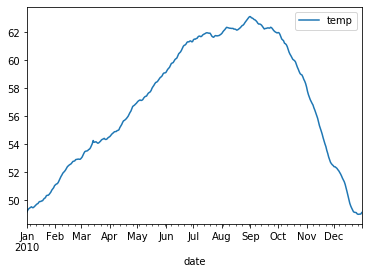

In [22]:
df.resample("D").mean().plot()
plt.show()

##### Write the code necessary to visualize the minimum temperature over time.

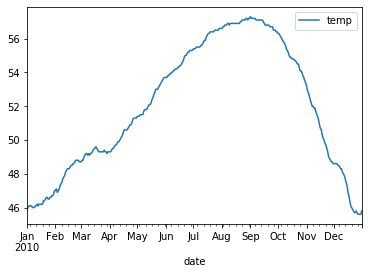

In [37]:
df.resample("D").min().plot()
plt.show()

##### Write the code necessary to visualize the maximum temperature over time.


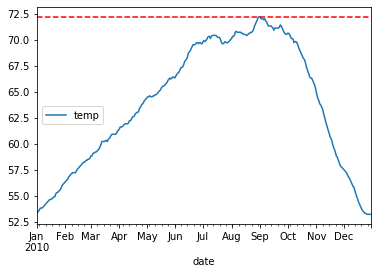

In [193]:
ax = df.resample("D").max().plot()
max_temp = df.resample("D").max().temp.max()
ax.axhline(max_temp, color="r", ls="--")
plt.show()

##### Which month is the coldest, on average?


In [195]:
# df
# df.resample("M").mean().min
df.resample("M").mean() == df.resample("M").mean().min()[0]
# df.resample("M").mean() [df.resample("M").mean() == df.resample("M").mean().min()[0]]


,temp
date,
2010-01-31,True
2010-02-28,False
2010-03-31,False
2010-04-30,False
2010-05-31,False
2010-06-30,False
2010-07-31,False
2010-08-31,False
2010-09-30,False


##### Which month has the highest average temperature?

In [196]:
df.resample("M").mean().max()

temp    62.487083
dtype: float64

##### Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [197]:
df_temp = df.resample("D").agg(["min","max"])
df_temp.head()

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8

In [198]:
df_temp["change"] = df_temp["temp"]["max"] - df_temp["temp"]["min"]
df_temp.head()

temp       change
             min   max       
date                         
2010-01-01  45.8  53.3    7.5
2010-01-02  46.0  53.4    7.4
2010-01-03  46.1  53.5    7.4
2010-01-04  46.1  53.6    7.5
2010-01-05  46.1  53.8    7.7

In [199]:
df_temp.resample("M").sum() [df_temp.resample("M").sum() == df_temp.resample("M").sum().change.max()].change

date
2010-01-31      NaN
2010-02-28      NaN
2010-03-31      NaN
2010-04-30      NaN
2010-05-31      NaN
2010-06-30      NaN
2010-07-31    433.3
2010-08-31      NaN
2010-09-30      NaN
2010-10-31      NaN
2010-11-30      NaN
2010-12-31      NaN
Freq: M, Name: change, dtype: float64

##### Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

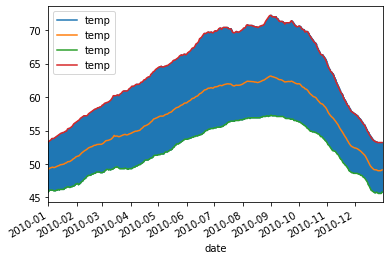

In [194]:
ax = df.plot()
df.resample('D').mean().plot(ax=ax)
df.resample('D').min().plot(ax=ax)
df.resample('D').max().plot(ax=ax)
plt.show()